In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

# Display the first 5 rows of the DataFrame
#print(df.head())

In [142]:
from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [143]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
varlist2 = ['furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

def x_map(x):
    return x.map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df[varlist2] = df[varlist2].apply(x_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

df[num_vars] = scaler.fit_transform(df[num_vars])
df['price'] /= (10**3)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.00,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,12250.00,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,12250.00,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,12215.00,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,11410.00,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820.00,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,1767.15,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,1750.00,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,1750.00,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [145]:
X = df.values[:, 1:]#np.hstack((X_3, X_1))
y = df.values[:, 0]

X = torch.from_numpy(X.astype(np.float64))
y = torch.from_numpy(y.astype(np.float64))

split = int(0.8*545)
shuffled = torch.randperm(545)
train = shuffled[:split]
val = shuffled[split:]

X_train = X[train]
y_train = y[train]
X_val = X[val]
y_val = y[val]

In [146]:
import torch.nn as nn
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(12, 32)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(32, 1))
])).double()

seq_model

Sequential(
  (hidden_linear): Linear(in_features=12, out_features=32, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=32, out_features=1, bias=True)
)

In [147]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    lossT = []
    lossV = []
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)
        lossT.append(loss_train.detach().numpy())
        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        lossV.append(loss_val.detach().numpy())
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

    return lossT, lossV

In [148]:
import torch.optim as optim

optimizer = optim.SGD(seq_model.parameters(), lr=1e-2) # <1>

lossT, lossV = training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = X_train,
    t_u_val = X_val,
    t_c_train = y_train,
    t_c_val = y_val)

#print('output', seq_model(X_val))
#print('answer', y_val)
#print('hidden', seq_model.hidden_linear.weight.grad)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10, Training loss 3249060.0033, Validation loss 4503875.5668
Epoch 20, Training loss 3249059.0424, Validation loss 4503013.0917
Epoch 30, Training loss 3249059.0424, Validation loss 4503013.0736
Epoch 40, Training loss 3249059.0424, Validation loss 4503013.0733
Epoch 50, Training loss 3249059.0424, Validation loss 4503013.0729
Epoch 60, Training loss 3249059.0424, Validation loss 4503013.0726
Epoch 70, Training loss 3249059.0424, Validation loss 4503013.0722
Epoch 80, Training loss 3249059.0424, Validation loss 4503013.0719
Epoch 90, Training loss 3249059.0424, Validation loss 4503013.0715
Epoch 100, Training loss 3249059.0424, Validation loss 4503013.0712


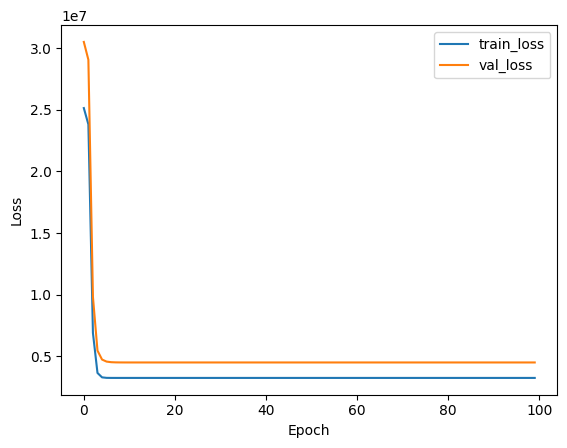

In [149]:
# Plot results
#plt.figure(figsize=(12, 4))
plt.plot(lossT, label='train_loss')
plt.plot(lossV, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

With Hut

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [98]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[num_vars] = scaler.fit_transform(df[num_vars])
df['price'] /= (10**3)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250.0,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250.0,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215.0,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410.0,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [100]:
df = pd.get_dummies(df, columns = ['furnishingstatus', 'parking'])
#print(one_hot_encoded_data)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,parking_0,parking_1,parking_2,parking_3
0,13300.0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0
1,12250.0,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1
2,12250.0,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,1,0
3,12215.0,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.0,1,0,0,0,0,0,1
4,11410.0,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0


In [101]:

X = df.values[:, 1:]
y = df.values[:, 0]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

X = torch.from_numpy(X.astype(np.float64))
y = torch.from_numpy(y.astype(np.float64))

split = int(0.8*545)
shuffled = torch.randperm(545)
train = shuffled[:split]
val = shuffled[split:]

X_train = X[train]
y_train = y[train]
X_val = X[val]
y_val = y[val]

In [102]:
import torch.nn as nn
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(17, 32)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(32, 1))
])).double()

seq_model

Sequential(
  (hidden_linear): Linear(in_features=17, out_features=32, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=32, out_features=1, bias=True)
)

In [103]:
import torch.optim as optim

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

lossT, lossV = training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = X_train,
    t_u_val = X_val,
    t_c_train = y_train,
    t_c_val = y_val)

#print('output', seq_model(X_val))
#print('answer', y_val)
#print('hidden', seq_model.hidden_linear.weight.grad)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([436])) that is different to the input size (torch.Size([436, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10, Training loss 11885998.7558, Validation loss 8324542.6690
Epoch 20, Training loss 5809520.3721, Validation loss 3446762.8436
Epoch 30, Training loss 4258590.1308, Validation loss 2501430.7525
Epoch 40, Training loss 3862739.9475, Validation loss 2411533.7916
Epoch 50, Training loss 3761705.5840, Validation loss 2465069.2240
Epoch 60, Training loss 3735918.2018, Validation loss 2517371.5716
Epoch 70, Training loss 3729336.3916, Validation loss 2550241.2206
Epoch 80, Training loss 3727656.4916, Validation loss 2568492.4616
Epoch 90, Training loss 3727227.7245, Validation loss 2578133.0395
Epoch 100, Training loss 3727118.2887, Validation loss 2583110.7037


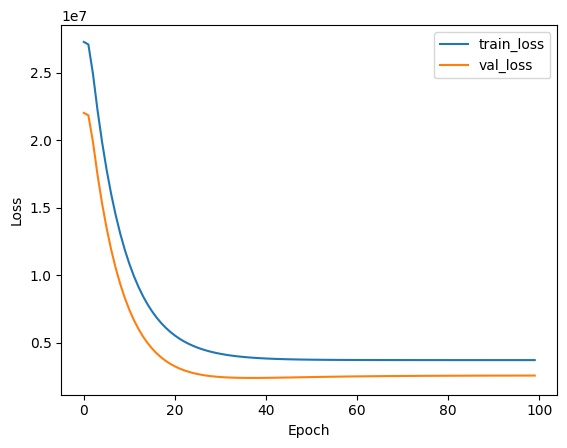

In [104]:
# Plot results
#plt.figure(figsize=(12, 4))
plt.plot(lossT, label='train_loss')
plt.plot(lossV, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()